# CS 6830 Project 7
Seth Beckett & Dave Storey

In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import seaborn as sns
import matplotlib.pyplot as plt

## Mushroom Dataset
This first part is the dataset that Seth worked with. It concerns classifying whether or not mushrooms are poisonous based on many different categorical attributes. More details about what the specific categories and decoding them can be found [here](https://www.kaggle.com/datasets/uciml/mushroom-classification).

In [2]:
shrooms = pd.read_csv("data/mushrooms.csv")
display(shrooms.columns)
shrooms.head()

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Full Models
First we will try creating logistic regression models and a simple linear SVC with all of the data, and test how both perform. The GridSearchCV can take a while to fit, so I am just using the optimal parameters I found here.

In [15]:
X = shrooms.drop("class", axis=1)
X = pd.get_dummies(X)
y = shrooms["class"]
y = y.map({"p": 1, "e": 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

print("Shape of data: ", X.shape)

Shape of data:  (8124, 117)


In [4]:
full_log_model = LogisticRegression(C=1, solver='liblinear', max_iter=1000)
full_log_model.fit(X_train, y_train)
y_pred = full_log_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       840
           1       1.00      1.00      1.00       785

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [5]:
full_linear_svc = SVC(kernel='linear', C=1)
full_linear_svc.fit(X_train, y_train)
y_pred = full_linear_svc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       840
           1       1.00      1.00      1.00       785

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



### Top 5 Features
As we can see, both of these models end up with perfect accuracy, precision, and recall. We know that we have a lot of data, so in order to make our model simpler we will try using the top 5 features and see how that affects our metrics.

In [6]:
# find which features are affect logistic prediction the most
log_coef = pd.DataFrame({"feature": X.columns, "coef": full_log_model.coef_[0]})
log_coef['abs_coef'] = log_coef['coef'].abs()
log_coef = log_coef.sort_values('abs_coef', ascending=False)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       840
           1       1.00      0.99      0.99       785

    accuracy                           1.00      1625
   macro avg       1.00      0.99      1.00      1625
weighted avg       1.00      1.00      1.00      1625



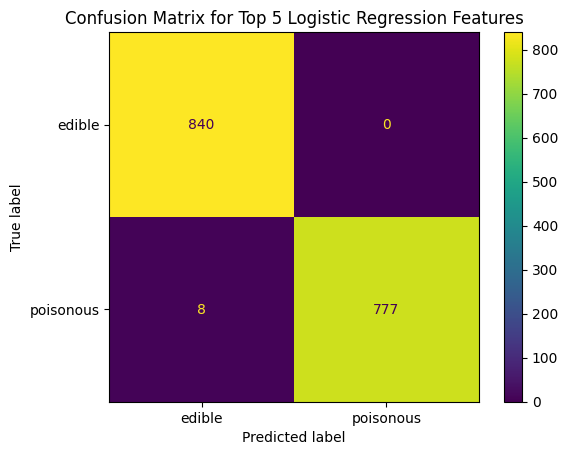

In [10]:
# logreg performance with top 5 features
top5_log_model = LogisticRegression(C=1, solver='liblinear', max_iter=1000)
top5_log_model.fit(X_train[log_coef['feature'].iloc[:5]], y_train)
y_pred = top5_log_model.predict(X_test[log_coef['feature'].iloc[:5]])
print(classification_report(y_test, y_pred))

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=["edible", "poisonous"])
disp.plot()
plt.title("Confusion Matrix for Top 5 Logistic Regression Features")
plt.show()

In [11]:
# find which features are affect SVC prediction the most
svc_coef = pd.DataFrame({"feature": X.columns, "coef": full_linear_svc.coef_[0]})
svc_coef['abs_coef'] = svc_coef['coef'].abs()
svc_coef = svc_coef.sort_values('abs_coef', ascending=False)


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       840
           1       1.00      0.99      0.99       785

    accuracy                           1.00      1625
   macro avg       1.00      0.99      1.00      1625
weighted avg       1.00      1.00      1.00      1625



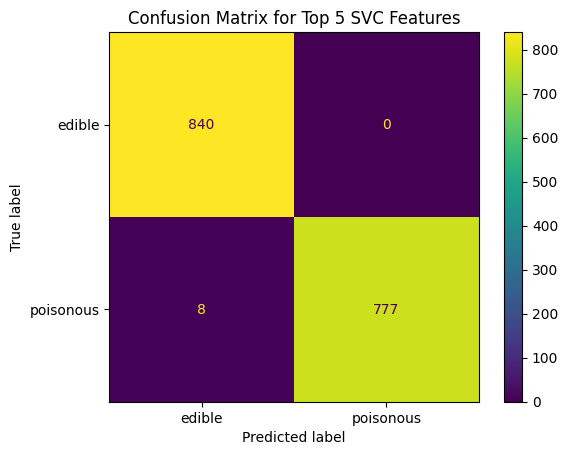

In [12]:
# SVC performance with top 5 features
top5_svc = SVC(kernel='linear', C=1)
top5_svc.fit(X_train[svc_coef['feature'].iloc[:5]], y_train)
y_pred = top5_svc.predict(X_test[svc_coef['feature'].iloc[:5]])
print(classification_report(y_test, y_pred))

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=["edible", "poisonous"])
disp.plot()
plt.title("Confusion Matrix for Top 5 SVC Features")
plt.show()

### Top 3 Features
That is insanely good for only considering 5 features. Let's see how accuracy is affected when we drop it down to the top 3 features for each.

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       840
           1       0.89      0.99      0.94       785

    accuracy                           0.94      1625
   macro avg       0.94      0.94      0.94      1625
weighted avg       0.94      0.94      0.94      1625



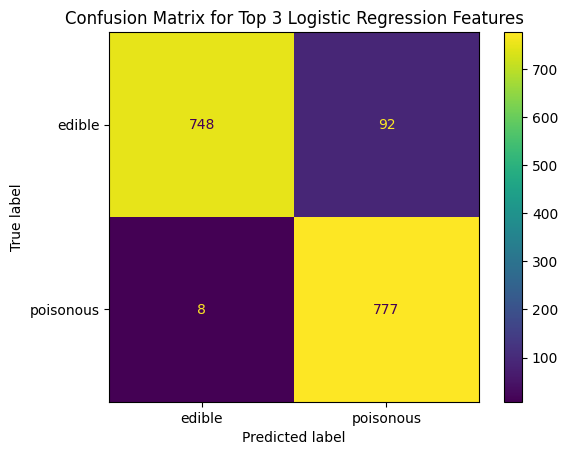

In [13]:
# evaluate logreg performance with top 3 features
top3_log_model = LogisticRegression(C=1, solver='liblinear', max_iter=1000)
top3_log_model.fit(X_train[log_coef['feature'].iloc[:3]], y_train)
y_pred = top3_log_model.predict(X_test[log_coef['feature'].iloc[:3]])
print(classification_report(y_test, y_pred))

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=["edible", "poisonous"])
disp.plot()
plt.title("Confusion Matrix for Top 3 Logistic Regression Features")
plt.show()

              precision    recall  f1-score   support

           0       0.53      1.00      0.70       840
           1       1.00      0.06      0.12       785

    accuracy                           0.55      1625
   macro avg       0.77      0.53      0.41      1625
weighted avg       0.76      0.55      0.42      1625



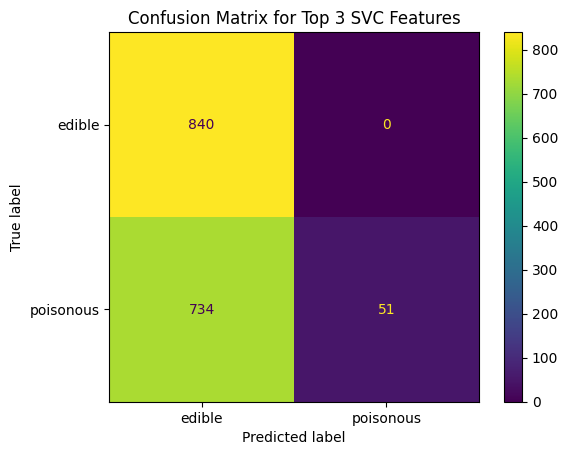

In [14]:
# evaluate SVC performance with top 3 features
top3_svc = SVC(kernel='linear', C=1)
top3_svc.fit(X_train[svc_coef['feature'].iloc[:3]], y_train)
y_pred = top3_svc.predict(X_test[svc_coef['feature'].iloc[:3]])
print(classification_report(y_test, y_pred))

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=["edible", "poisonous"])
disp.plot()
plt.title("Confusion Matrix for Top 3 SVC Features")
plt.show()

In [16]:
# print the top 5 logreg and top 5 svc features w/ their coefficients
print("Top 5 Logistic Regression Features")
display(log_coef.iloc[:5])

print("Top 5 SVC Features")
display(svc_coef.iloc[:5])

Top 5 Logistic Regression Features


,feature,coef,abs_coef
27,odor_n,-3.997261,3.997261
100,spore-print-color_r,3.490418,3.490418
25,odor_l,-2.829747,2.829747
22,odor_a,-2.757720,2.757720
23,odor_c,2.706386,2.706386


Top 5 SVC Features


,feature,coef,abs_coef
100,spore-print-color_r,1.468686,1.468686
23,odor_c,1.072082,1.072082
25,odor_l,-1.012264,1.012264
22,odor_a,-1.012237,1.012237
27,odor_n,-0.870139,0.870139


### Conclusion
As we can see, the logistic regression model using the features "odor_n", "spore-print-color_r", and "odor_l" performs amazingly well. Both SVC and logistic regression only have 8 misclassifications when using their top 5 features, but SVC can't be trusted to save you from poisonous mushrooms if you only use the top 3 features.

Decoding the odor variables goes as follows: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s. For spore print color, it goes as follows: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y.

One interesting future direction one could take is to try looking at feature importance when not considering odor, since odor might be tricky to identify for some people.